<a href="https://colab.research.google.com/github/JairoRotava/UFPEL/blob/main/aed/Semana_5_exercicios_grafos_BFS_DFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 5 - Grafos

In [1]:
# Instala graphviz. Só precisa fazer uma vez
!pip install graphviz

In [2]:
# Codigo original retirado de:https://www.programiz.com/dsa/graph-dfs

import graphviz
import sys


def print_graph(graph, digraph = False):
    if digraph:
        dot = graphviz.Digraph()
    else:
        dot = graphviz.Graph(strict=True)
        
    for key, value in graph.items():
        dot.node(name=str(key), label=str(key))
        for v in value:
            dot.edge(str(key),str(v))
        
    display(dot)

Digraph


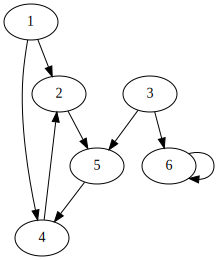

Graph


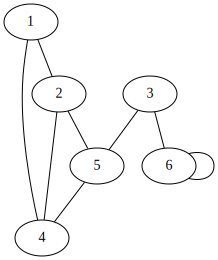

In [3]:
graph = {'1': set(['2', '4']),
         '2': set(['5']),
         '3': set(['5', '6']),
         '4': set(['2']),
         '5': set(['4']),
         '6': set(['6'])
        }

print("Digraph")
print_graph(graph, digraph=True)
print("Graph")
print_graph(graph, digraph=False)

## BFS Algorithm

In [4]:
# BFS algorithm in Python

import collections
     

# Codigo igual da apresentacao Marilton
def bfs(G, s):
    BRANCO = 0
    CINZA = 1
    PRETO = 2
    cor = {}
    d = {}
    pred = {}
    
    for key in G:
        cor[key] = BRANCO
        d[key] = None
        pred[key] = None
    
    cor[s] = CINZA
    d[s] = 0
    pred[s] = None
    

    Q = collections.deque([s])
    while Q:
        u = Q.popleft()
        for v in G[u]:
            if cor[v] == BRANCO:
                cor[v] = CINZA
                d[v] = d[u] + 1
                pred[v] = u
                Q.append(v)
            cor[u] = PRETO
    return d

## S237E1: Mostre o resultado da busca em largura sobre o grafo orientado do slide 224, usando o vértice 3 como partida.

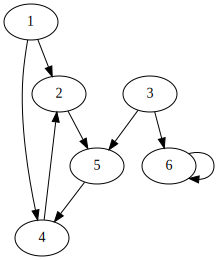

1: None
2: 3
3: 0
4: 2
5: 1
6: 1


In [5]:
graph = {'1': ['2', '4'],
         '2': ['5'],
         '3': ['5', '6'],
         '4': ['2'],
         '5': ['4'],
         '6': ['6']
        }

print_graph(graph, digraph=True)
d = bfs(graph, '3')
for key in graph:
    print("{}: {}".format(key, d[key]))

## S237E2: Mostre o resultado da busca em largura sobre o grafo não orientado do slide 227, usando o vértice u como partida

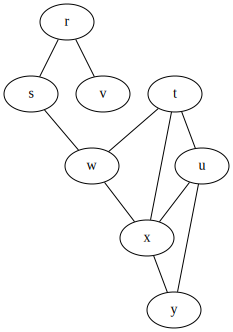

r: 4
s: 3
t: 1
u: 0
v: 5
w: 2
x: 1
y: 1


In [6]:
graph_2 = {'r': ['s', 'v'],
         's': ['r', 'w'],
         't': ['u', 'w', 'x'],
         'u': ['t', 'x', 'y'],
         'v': ['r'],
         'w': ['s', 't', 'x'],
         'x': ['t', 'u', 'w', 'y'],
         'y': ['u', 'x'],
        }

print_graph(graph_2, digraph=False)
d = bfs(graph_2, 'u')
for key in graph_2:
    print("{}: {}".format(key, d[key]))

## DFS Algorithm

In [7]:

# DFS algorithm
def dfs_old(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)

    print(start)

    for next in graph[start] - visited:
        dfs(graph, next, visited)
    return visited

# Algoritmo apresentacao marilton
def dfs(G):
    BRANCO = 0
    CINZA = 1
    PRETO = 2
    cor = {}
    d = {}
    pred = {}
    f = {}
    tempo = 0
    
    def dfs_visit(u):
        cor[u] = CINZA
        nonlocal tempo
        tempo = tempo + 1
        d[u] = tempo
        for v in G[u]:
            if cor[v] == BRANCO:
                pred[v] = u
                dfs_visit(v)
        cor[u] = PRETO
        tempo = tempo + 1
        f[u] = tempo
        
    
    for u in G:
        cor[u] = BRANCO
        pred[u] = None
    
    for u in G:
        if cor[u] == BRANCO:
            dfs_visit(u)
            
    return d, f

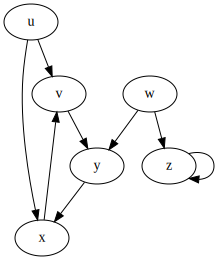

u: 1/8
v: 2/7
w: 9/12
x: 4/5
y: 3/6
z: 10/11


In [8]:
graph_3 = {'u': ['v', 'x'],
         'v': ['y'],
         'w': ['y', 'z'],
         'x': ['v',],
         'y': ['x'],
         'z': ['z']
        }

print_graph(graph_3, digraph=True)
d,f = dfs(graph_3)
for key in graph_3:
    print("{}: {}/{}".format(key, d[key], f[key]))

## S253E1: Mostre como a busca em profundidade funciona sobre o grafo abaixo. Suponha que o loop PARA (o segundo) do procedimento DFS considera os vértices em ordem alfabética, e suponha que a lista de adjacências esteja em ordem alfabética. Mostre os tempos de descoberta e término de cada vértice. Utilize q como vértice inicial.

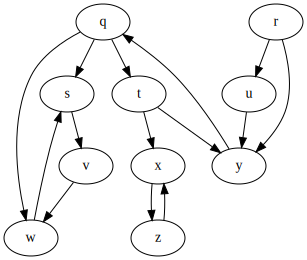

q: 1/16
r: 17/20
s: 2/7
t: 8/15
u: 18/19
v: 3/6
w: 4/5
x: 9/12
y: 13/14
z: 10/11


In [9]:
graph_3 = {'q': ['s', 't', 'w'],
         'r': ['u', 'y'],
         's': ['v'],
         't': ['x', 'y'],
         'u': ['y'],
         'v': ['w'],
         'w': ['s'],
         'x': ['z'],
         'y': ['q'],
         'z': ['x'],
        }

print_graph(graph_3, digraph=True)
d,f = dfs(graph_3)
for key in graph_3:
    print("{}: {}/{}".format(key, d[key], f[key]))